# Diabetic Retinopathy Detection model
This notebook shows how you can use Python API to perform inference on endpoint created from the model

### 1. Start the trial or buy our VitechLab Retinopathy Detection model on AWS Marketplace

You can find our model here: https://aws.amazon.com/marketplace/pp/prodview-b53upp27dnmzq

### 2. Create a new endpoint using AWS SageMaker Python API or SageMaker console
You can find our example here: [PPE Detection model deployment and usage](https://github.com/VITechLab/aws-sagemaker-examples/blob/master/Laboratory-PPE-Detector/Using-Laboratory-Personal-Protection-Equipment-Detection-model.ipynb)

### 3. Generating Prediction using `RealTimePredictor`

In [1]:
import sagemaker as sage

sess = sage.Session()
endpoint_name = 'diabetic-retinopathy-model-example-endpoint'

predictor = sage.predictor.RealTimePredictor(
    endpoint_name,
    sagemaker_session=sess, 
    content_type="image/jpeg"
)

## Generating prediction

In [28]:
img_file = 'sample_data/level-4 (034cb07a550f).png'

with open(img_file, 'rb') as image:
    f = image.read()
    image_bytes = bytearray(f)

prediction_result = predictor.predict(image_bytes).decode("utf-8")
prediction_result

'{"classification_result": 4, "classification_score": 4.115696907043457}'

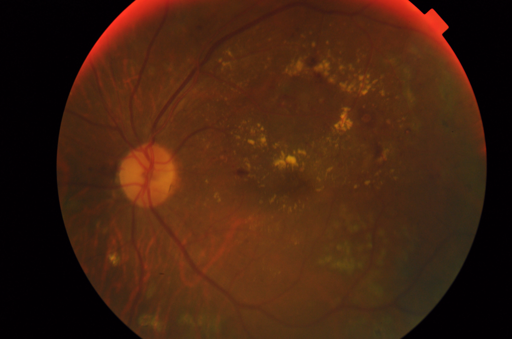

In [3]:
from PIL import Image

img = Image.open(img_file)
img.thumbnail((512,512))
img

### Delete the Endpoint
Having an endpoint running will incur some costs. Therefore as a clean-up job, we should delete the endpoint.

In [12]:
sess.delete_endpoint(predictor.endpoint)